In [48]:
!pip install matplotlib 
!pip install sweetviz
!pip install geopandas



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [51]:
import os
import warnings

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as path_effects




In [145]:
df_musee = pd.read_csv(MUSEE_PATH, sep="|", dtype=str, header=0)
df_musee.head(2)

,Identifiant,Nom_officiel,Adresse,Lieu,Code_postal,Ville,Departement,Region,URL,Telephone,...,Themes,Artiste,Personnage_phare,Interet,Protection_batiment,Protection_espace,Refmer,Annee_creation,Date_de_mise_a_jour,Coordonnees
0,M1128,musée des sapeurs-pompiers de Lyon,358 avenue de Champagne,Centre de secours principal,69009,Lyon,Rhône,Auvergne-Rhône-Alpes,museepompiers.com/,04 72 17 54 54,...,"Armes, Uniformes, Véhicules pompiers, Archives...",NaN,NaN,NaN,NaN,NaN,SPR8400131,1971,2025-07-25,"45.790491, 4.797411"
1,M0001,musée de la Folie Marco,30 rue du docteur Sultzer,NaN,67140,Barr,Bas-Rhin,Grand Est,www.musee-foliemarco.com,03 88 08 94 72,...,"Arts décoratifs : Mobilier, Objets d'art",NaN,NaN,Demeure patricienne d'architecture française d...,Protégé au titre des Monuments historiques : h...,Abords d'un Monument historique. Site inscrit.,PA00084599;IA00115077,1960,2025-07-25,"48.410166, 7.451102"


In [146]:
df_musee.describe

<bound method NDFrame.describe of      Identifiant                                       Nom_officiel  \
0          M1128                 musée des sapeurs-pompiers de Lyon   
1          M0001                            musée de la Folie Marco   
2          M0002                                musée de La Poterie   
3          M0003  musée du Pays de Hanau - histoire et vies d’un...   
4          M0004                                     musée alsacien   
...          ...                                                ...   
1217       M1220                  musée de la Bataille de Fromelles   
1218       M1221                    musée & jardins Cécile Sabourdy   
1219       M1222                       musée de la Création Franche   
1220       M1223     Musée du pays de Buch et du bassin d’Arcachon    
1221       M1224                  musée de la Grande Loge de France   

                                          Adresse  \
0                         358 avenue de Champagne   
1      

In [147]:
df_musee.info

<bound method DataFrame.info of      Identifiant                                       Nom_officiel  \
0          M1128                 musée des sapeurs-pompiers de Lyon   
1          M0001                            musée de la Folie Marco   
2          M0002                                musée de La Poterie   
3          M0003  musée du Pays de Hanau - histoire et vies d’un...   
4          M0004                                     musée alsacien   
...          ...                                                ...   
1217       M1220                  musée de la Bataille de Fromelles   
1218       M1221                    musée & jardins Cécile Sabourdy   
1219       M1222                       musée de la Création Franche   
1220       M1223     Musée du pays de Buch et du bassin d’Arcachon    
1221       M1224                  musée de la Grande Loge de France   

                                          Adresse  \
0                         358 avenue de Champagne   
1        

In [148]:
df_musee.shape

(1222, 24)

In [149]:
df_musee.isna().sum()

Identifiant              0
Nom_officiel             0
Adresse                 29
Lieu                   740
Code_postal              0
Ville                    0
Departement              0
Region                   0
URL                     87
Telephone               26
Categorie              704
Domaine_thematique      44
Histoire                52
Atout                   66
Themes                 145
Artiste                712
Personnage_phare       692
Interet                272
Protection_batiment    730
Protection_espace      445
Refmer                 443
Annee_creation         944
Date_de_mise_a_jour      0
Coordonnees              0
dtype: int64

In [150]:
print(df_freq.columns)


Index(['REF DU MUSEE;NOM DU MUSEE;ANNEE;REGION;VILLE;DATE APPELLATION;PAYANT;GRATUIT;TOTAL;NOTE;ID MUSEOFILE;DEPARTEMENT;OBSERVATIONS'], dtype='object')


In [49]:
#fichier avec frequentation des musées depuis 2000
import pandas as pd
import matplotlib.pyplot as plt 
import os
import seaborn as sns

freq_path='data/frequentation-des-musees-de-france.csv'
df_freq= pd.read_csv(freq_path, sep=";", dtype=str)


In [157]:
df_freq.describe

<bound method NDFrame.describe of       REF DU MUSEE;NOM DU MUSEE;ANNEE;REGION;VILLE;DATE APPELLATION;PAYANT;GRATUIT;TOTAL;NOTE;ID MUSEOFILE;DEPARTEMENT;OBSERVATIONS
0      2915101;Musée de Morlaix;2001;BRETAGNE;MORLAIX...                                                                           
1      2923201;Musée des Beaux-Arts;2001;BRETAGNE;QUI...                                                                           
2      3528802;Musée d'Histoire de la Ville de Saint-...                                                                           
3      3600601;Musée de la Chemiserie et de l'Eléganc...                                                                           
4      1038705;Maison de l'Outil  et de la Pensée Ouv...                                                                           
...                                                  ...                                                                           
24766  0608804;Musée d'Art Naïf Anatole Ja

In [168]:
def rename_duplicates(cols):
    seen = {}
    new_cols = []
    for col in cols:
        if col not in seen:
            seen[col] = 1
            new_cols.append(col)
        else:
            seen[col] += 1
            new_cols.append(f"{col}_{seen[col]}")
    return new_cols

df.columns = rename_duplicates(df.columns)
print(df.columns.to_list())


['ref du musee', 'nom du musee', 'annee', 'region', 'ville', 'annee_2', 'payant', 'gratuit', 'total', 'note', 'id museofile', 'departement', 'observations']


In [169]:
print(df['annee'].head())
print(df['annee_2'].head())

0    2001
1    2001
2    2001
3    2001
4    2001
Name: annee, dtype: object
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: annee_2, dtype: object


In [170]:
df['annee'] = pd.to_numeric(df['annee'], errors='coerce')
df['visiteurs'] = pd.to_numeric(df['total'], errors='coerce')

In [ ]:
# Charger la géométrie des régions françaises
url_regions = "https://france-geojson.gregoiredavid.fr/repo/regions.geojson"
gdf_regions = gpd.read_file(url_regions)
gdf_regions['nom'] = gdf_regions['nom'].str.strip().str.upper()


In [47]:

# Charger les données de fréquentation musées
df = pd.read_csv('data/frequentation-des-musees-de-france.csv', sep=";", dtype=str)

In [27]:
# Nettoyer colonnes dupliquées et noms colonnes
df = df.loc[:, ~df.columns.duplicated()]
df.columns = [col.strip().lower() for col in df.columns]


In [28]:

# Conversion colonnes nécessaires en numérique
df['annee'] = pd.to_numeric(df['annee'], errors='coerce')
df['total'] = pd.to_numeric(df['total'], errors='coerce')

In [29]:

# Année la plus récente dans le dataset
annee_recente = int(df['annee'].max())
df_recent = df[df['annee'] == annee_recente].copy()


In [30]:

# Uniformiser noms régions pour merge
df_recent['region'] = df_recent['region'].str.strip().str.upper()

In [31]:
# Agréger fréquentation par région
agg_region = df_recent.groupby('region', as_index=False)['total'].sum()
agg_region.rename(columns={'total': 'visiteurs'}, inplace=True)

In [32]:
# Fusion géo + fréquentation
gdf_merged = gdf_regions.merge(agg_region, left_on='nom', right_on='region', how='left')
gdf_merged['visiteurs'] = gdf_merged['visiteurs'].fillna(0)

In [33]:
# Top 10 régions les plus visitées
top10 = gdf_merged.nlargest(10, 'visiteurs')

In [52]:
top10.head()

,code,nom,geometry,region,visiteurs
0,11,ÎLE-DE-FRANCE,"POLYGON ((1.92215 48.4576, 1.92074 48.44775, 1...",ÎLE-DE-FRANCE,15880456.0
16,93,PROVENCE-ALPES-CÔTE D'AZUR,"MULTIPOLYGON (((6.94833 44.65482, 6.95451 44.6...",PROVENCE-ALPES-CÔTE D'AZUR,2182922.0
15,84,AUVERGNE-RHÔNE-ALPES,"POLYGON ((3.36135 44.97141, 3.35453 44.95482, ...",AUVERGNE-RHÔNE-ALPES,1946641.0
5,44,GRAND EST,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...",GRAND EST,1757159.0
4,32,HAUTS-DE-FRANCE,"POLYGON ((4.14089 49.97876, 4.15398 49.97484, ...",HAUTS-DE-FRANCE,1678397.0


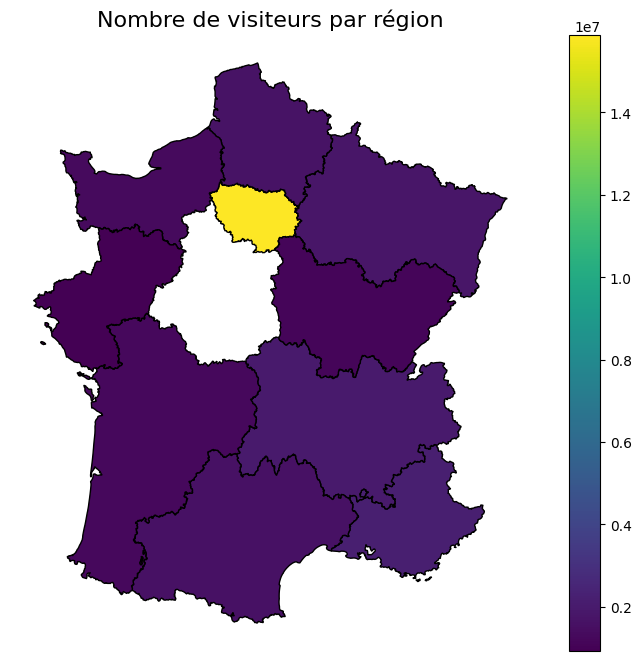

In [55]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Si ton dataframe est déjà un GeoDataFrame
gdf = top10  # ou gpd.GeoDataFrame(df)

# Création du plot
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(
    column='visiteurs',
    cmap='viridis',         # palette très contrastée
    legend=True,
    edgecolor='black',      # contours noirs
    linewidth=1,            # un peu plus épais
    ax=ax
)

ax.set_title("Nombre de visiteurs par région", fontsize=16)
ax.axis('off')  # cacher les axes
plt.show()


In [34]:

# Setup figure avec GridSpec (carte + bar chart)
fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1], wspace=0.3)

<Figure size 1600x1000 with 0 Axes>

In [35]:
# Carte choroplèthe
ax_map = fig.add_subplot(gs[0])
gdf_merged.plot(
    column='visiteurs',
    cmap='YlGnBu',
    linewidth=0.8,
    edgecolor='0.8',
    ax=ax_map,
    legend=True,
    legend_kwds={'label': f'Visiteurs musées en {annee_recente}', 'orientation': 'vertical'}
)
ax_map.set_title(f'Fréquentation des musées par région en {annee_recente}', fontsize=18, fontweight='bold')
ax_map.axis('off')

(np.float64(-67.68808449444215),
 np.float64(61.71875744450715),
 np.float64(-25.01067703378675),
 np.float64(54.71231612529175))

In [36]:
# Labels sur la carte
for idx, row in gdf_merged.iterrows():
    if row['visiteurs'] > 0:
        x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
        ax_map.text(
            x, y,
            f"{row['nom']}\n{row['visiteurs'] / 1_000_000:.2f} M",
            ha='center',
            fontsize=8,
            fontweight='bold',
            color='darkblue',
            path_effects=[path_effects.withStroke(linewidth=1, foreground="white")]
        )

In [37]:






# Bar chart horizontal du top 10
ax_bar = fig.add_subplot(gs[1])
ax_bar.barh(top10['nom'], top10['visiteurs'] / 1_000_000, color='steelblue')
ax_bar.invert_yaxis()
ax_bar.set_xlabel("Millions de visiteurs")
ax_bar.set_title("Top 10 régions les plus visitées", fontsize=16, fontweight='bold')

# Ajouter les valeurs à côté des barres
for i, val in enumerate(top10['visiteurs'] / 1_000_000):
    ax_bar.text(val + 0.05, i, f"{val:.2f} M", va='center', fontsize=9)

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [42]:
import sys
sys.setrecursionlimit(1500)

import geopandas as gpd

url_regions = "https://france-geojson.gregoiredavid.fr/repo/regions.geojson"

gdf_regions = gpd.read_file(url_regions)
print(gdf_regions.head())

  code                      nom  \
0   11            Île-de-France   
1   24      Centre-Val de Loire   
2   27  Bourgogne-Franche-Comté   
3   28                Normandie   
4   32          Hauts-de-France   

                                            geometry  
0  POLYGON ((1.92215 48.4576, 1.92074 48.44775, 1...  
1  POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...  
2  POLYGON ((6.94054 47.43337, 6.94168 47.4158, 6...  
3  POLYGON ((-1.11962 49.35557, -1.11503 49.3624,...  
4  POLYGON ((4.14089 49.97876, 4.15398 49.97484, ...  


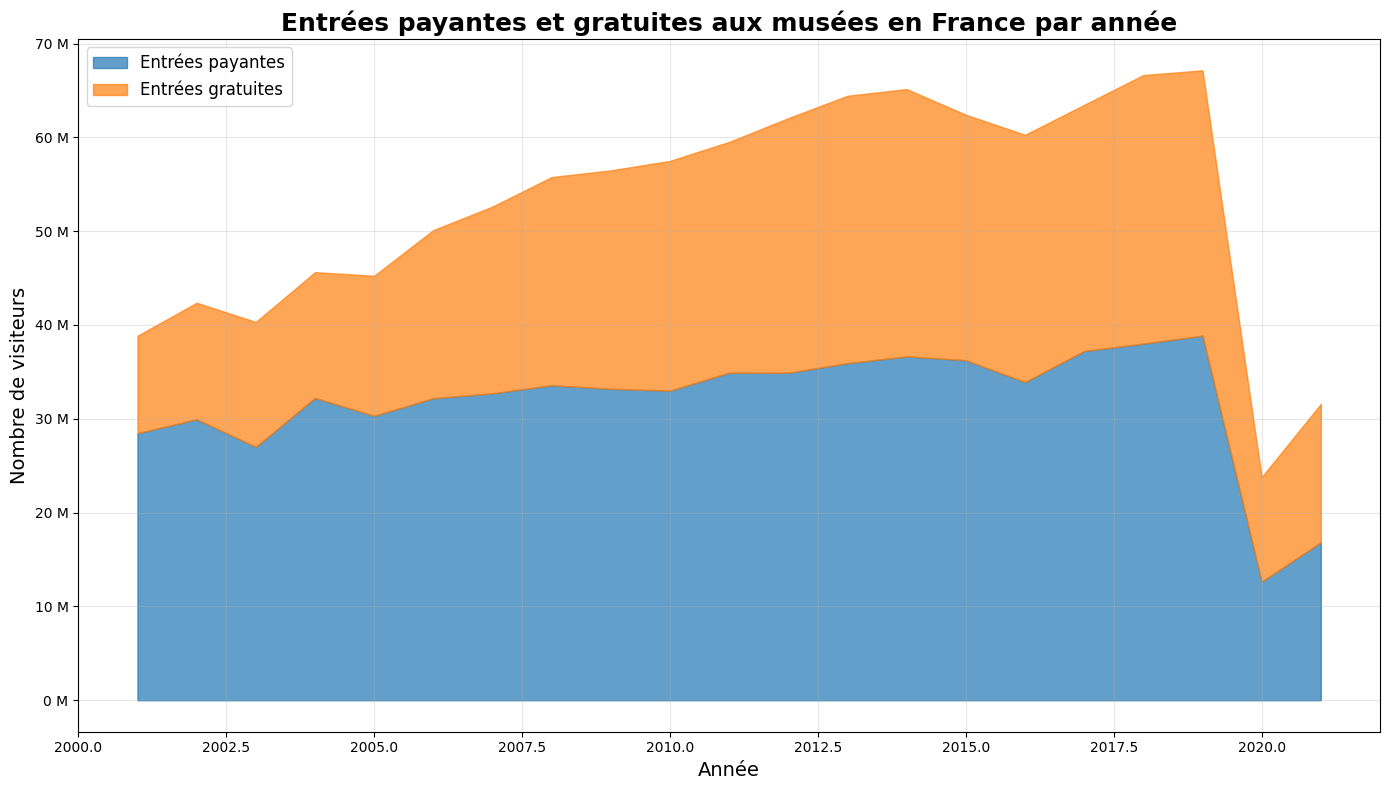

In [57]:
#Je te prépare un graphique en air (stacked area chart) plus avancé et pertinent, avecLes entrées payantes et gratuites empilées,Un affichage du total avec une courbe en trait au-dessus,


import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Charger le CSV (à adapter avec ton chemin)
df = pd.read_csv("data/frequentation-des-musees-de-france.csv", sep=";", dtype=str)

# Nettoyage colonnes
df.columns = [col.strip().lower() for col in df.columns]
df = df.loc[:, ~df.columns.duplicated()]

# Conversion en numérique
df['annee'] = pd.to_numeric(df['annee'], errors='coerce')
df['payant'] = pd.to_numeric(df['payant'], errors='coerce')
df['gratuit'] = pd.to_numeric(df['gratuit'], errors='coerce')

# Supprimer les lignes avec années manquantes
df_clean = df.dropna(subset=['annee', 'payant', 'gratuit'])

# Agréger par année
agg_annee = df_clean.groupby('annee')[['payant', 'gratuit']].sum().reset_index()
agg_annee = agg_annee.sort_values('annee')

# Création du graphique
plt.figure(figsize=(14, 8))

# Zone "payant"
plt.fill_between(
    agg_annee['annee'],
    agg_annee['payant'],
    color='#1f77b4',
    alpha=0.7,
    label='Entrées payantes'
)

# Zone "gratuit"
plt.fill_between(
    agg_annee['annee'],
    agg_annee['payant'] + agg_annee['gratuit'],
    agg_annee['payant'],
    color='#ff7f0e',
    alpha=0.7,
    label='Entrées gratuites'
)

# Format en millions
formatter = FuncFormatter(lambda x, _: f'{int(x/1_000_000)} M')
plt.gca().yaxis.set_major_formatter(formatter)

# Titres et style
plt.title("Entrées payantes et gratuites aux musées en France par année", fontsize=18, fontweight='bold')
plt.xlabel("Année", fontsize=14)
plt.ylabel("Nombre de visiteurs", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()




In [2]:
!ls data/museecleaned.csv

data/museecleaned.csv


In [4]:
#OFFRE MUSEE EN FRANCE ET PAR THEMATIQUE 
# Patch pour compatibilité avec les versions récentes de NumPy


import pandas as pd
import plotly.express as px
import requests

# 1. Charger ton dataset
df = pd.read_csv("data/museecleaned.csv", sep=',', encoding='utf-8')

# 2. Télécharger le GeoJSON des régions françaises (source officielle IGN via data.gouv.fr)
url_geojson = "https://france-geojson.gregoiredavid.fr/repo/regions.geojson"
geojson_regions = requests.get(url_geojson).json()

# 3. Vérifier les colonnes
print(df.columns)

# --- Adapter ces colonnes aux noms réels de ton fichier ---
col_region = "Region"  # Nom de la colonne région dans ton CSV
col_type = "Domaine"  # Colonne indiquant le type de musée

# 4. Comptage des musées par région
region_counts = df.groupby(col_region).size().reset_index(name="Nombre de musées")

# 5. Carte choroplèthe
fig_map = px.choropleth(
    region_counts,
    geojson=geojson_regions,
    featureidkey="properties.nom",
    locations=col_region,
    color="Nombre de musées",
    color_continuous_scale="Reds",
    title="Offre de musées en France par région"
)
fig_map.update_geos(fitbounds="locations", visible=False)
fig_map.show()



Index(['Identifiant', 'Nom_officiel', 'Adresse', 'Code_postal', 'Ville',
       'Departement', 'Region', 'Coordonnees', 'Categorie',
       'Domaine_thematique', 'Themes', 'Protection_batiment',
       'Protection_espace', 'URL', 'Date_de_mise_a_jour'],
      dtype='object')


In [7]:
!ls data

ls: data: No such file or directory


In [62]:
df.head()

,Identifiant,Nom_officiel,Adresse,Code_postal,Ville,Departement,Region,Coordonnees,Categorie,Domaine_thematique,Themes,Protection_batiment,Protection_espace,URL,Date_de_mise_a_jour
0,M1128,musée des sapeurs-pompiers de Lyon,358 avenue de Champagne,69009,Lyon,Rhône,Auvergne-Rhône-Alpes,"45.790491, 4.797411",Inconnu,Ethnologie;Histoire;Technique et industrie,"Armes, Uniformes, Véhicules pompiers, Archives...",Inconnu,Inconnu,museepompiers.com/,2025-07-25
1,M0001,musée de la Folie Marco,30 rue du docteur Sultzer,67140,Barr,Bas-Rhin,Grand Est,"48.410166, 7.451102",Musée de site,Arts décoratifs,"Arts décoratifs : Mobilier, Objets d'art",Protégé au titre des Monuments historiques : h...,Abords d'un Monument historique. Site inscrit.,www.musee-foliemarco.com,2025-07-25
2,M0002,musée de La Poterie,2 rue de Kuhlendorf,67660,Betschdorf,Bas-Rhin,Grand Est,"48.900348, 7.914409",musée en milieu rural,Arts décoratifs;Technique et industrie;Ethnologie,Arts décoratifs : Céramique,Inconnu,Inconnu,www.betschdorf.com/vie-culturelle-et-associati...,2025-07-25
3,M0003,musée du Pays de Hanau - histoire et vies d’un...,3 place du château,67330,Bouxwiller,Bas-Rhin,Grand Est,"48.824977, 7.482915",écomusée ; musée en milieu rural,Archéologie;Ethnologie;Histoire;Sciences de la...,Art religieux (Art protestant);Arts décoratifs...,Protégé au titre des Monuments historiques : h...,Inconnu,www.museedupaysdehanau.eu,2025-07-25
4,M0004,musée alsacien,1 place Joseph Thierry,67500,Haguenau,Bas-Rhin,Grand Est,"48.814611, 7.789527",Inconnu,Ethnologie;Histoire;Technique et industrie,"Ethnologie : Costume, Habitat, Mobilier, Métie...",Inconnu,Abords d'un Monument historique.,www.ville-haguenau.fr/musee-alsacien,2025-07-25


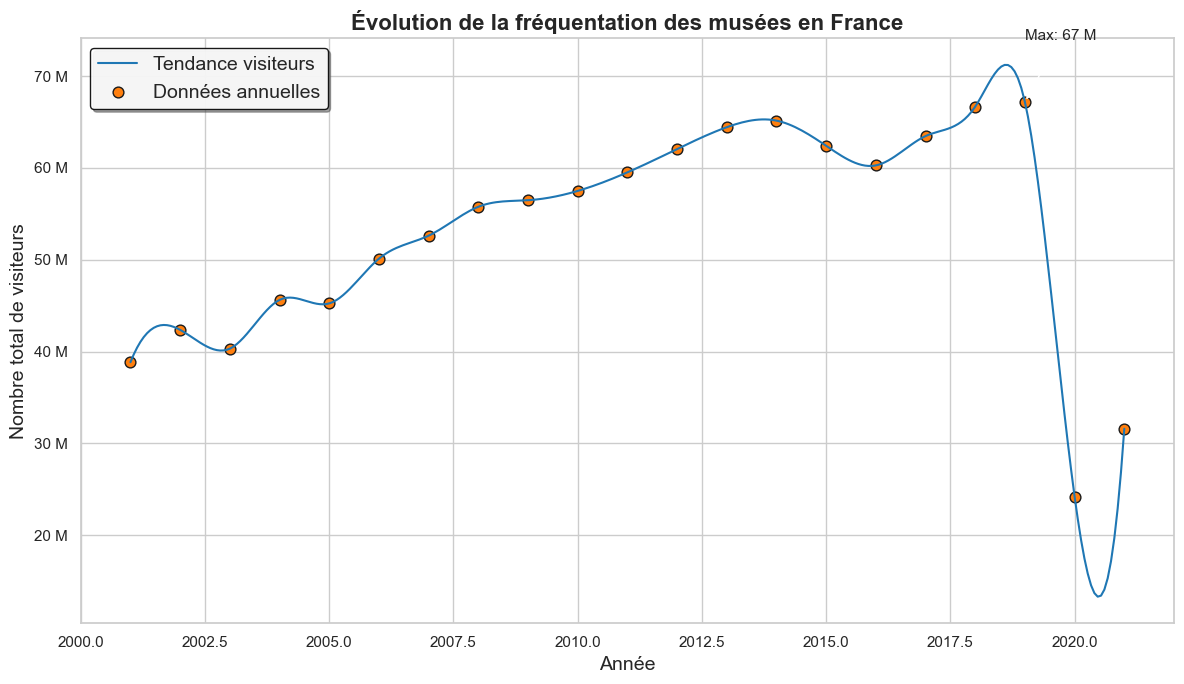

In [181]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 7))
plt.plot(x_new, y_smooth, color='#1f77b4', label='Tendance visiteurs')
plt.scatter(x, y, color='#ff7f0e', edgecolor='k', s=60, label='Données annuelles')

# Annotations max en millions
max_idx = y.idxmax()
plt.annotate(
    f'Max: {y[max_idx]/1_000_000:.0f} M',
    xy=(x[max_idx], y[max_idx]),
    xytext=(x[max_idx], y[max_idx] * 1.1),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=11
)

# Formater l'axe Y en millions
formatter = FuncFormatter(lambda val, _: f'{val/1_000_000:.0f} M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title("Évolution de la fréquentation des musées en France", fontsize=16, weight='bold')
plt.xlabel("Année", fontsize=14)
plt.ylabel("Nombre total de visiteurs", fontsize=14)

plt.legend(
    fontsize=14,
    frameon=True,
    shadow=True,
    framealpha=0.9,
    edgecolor='black',
    loc='best'
)

plt.tight_layout()
plt.show()

/var/folders/qh/wjw4zfcd5xz24bq6xyr2526m0000gp/T/ipykernel_91728/1497564462.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




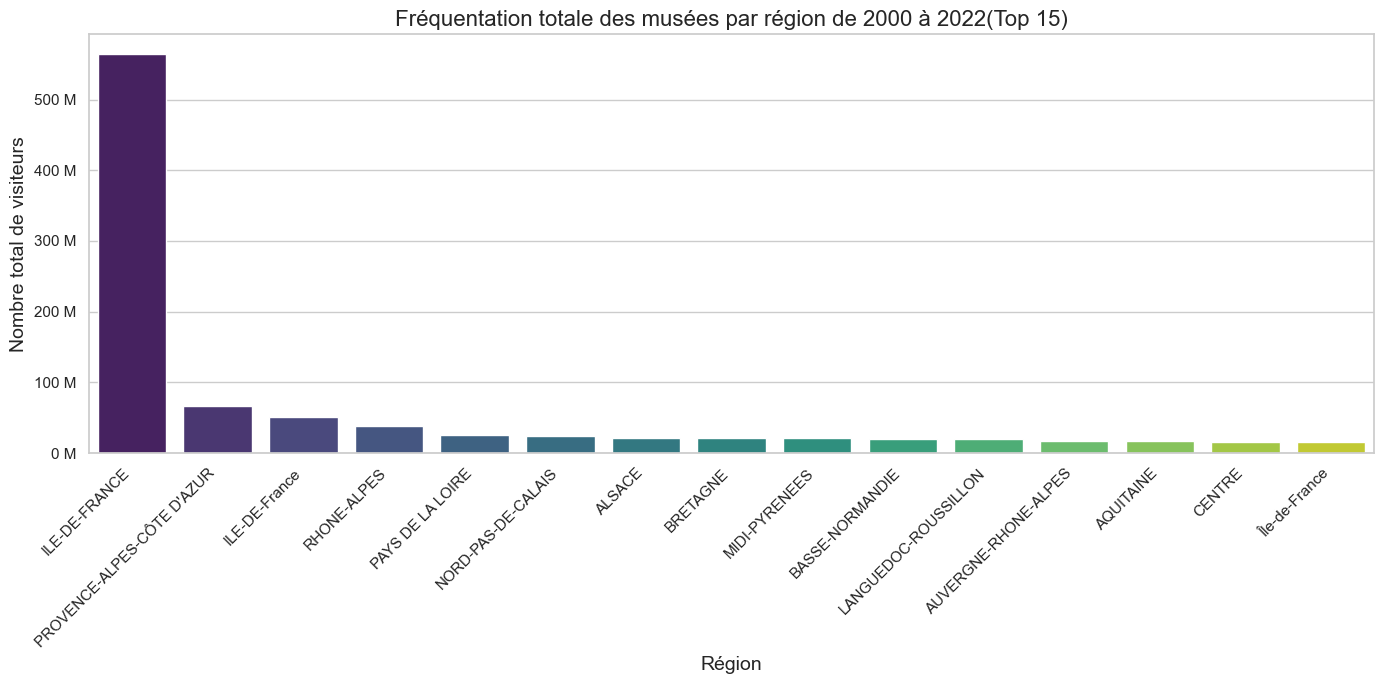

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Agréger par région et ne garder que les 15 premières
agg_region = (
    df_clean.groupby('region')['visiteurs']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .head(15)
)

plt.figure(figsize=(14, 7))
sns.barplot(data=agg_region, x='region', y='visiteurs', palette="viridis")

# Rotation des labels X
plt.xticks(rotation=45, ha='right')

# Formater l'axe Y en millions
formatter = FuncFormatter(lambda x, _: f'{x/1_000_000:.0f} M')
plt.gca().yaxis.set_major_formatter(formatter)

# Titres et labels
plt.title("Fréquentation totale des musées par région de 2000 à 2022(Top 15)", fontsize=16)
plt.xlabel("Région", fontsize=14)
plt.ylabel("Nombre total de visiteurs", fontsize=14)

plt.tight_layout()
plt.show()

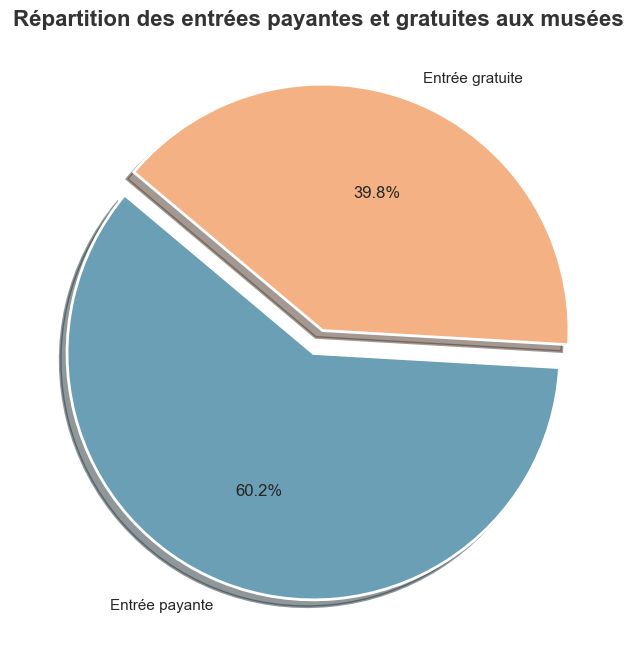

In [177]:
# Couleurs pastel modernes
colors_modern = ['#6A9FB5', '#F4B183']  # bleu pastel et orange doux

plt.figure(figsize=(8, 8))
plt.pie(
    data_pie,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors_modern,
    shadow=True,
    explode=[0.05, 0.05],
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}  # bords blancs pour plus de netteté
)
plt.title("Répartition des entrées payantes et gratuites aux musées", fontsize=16, fontweight='bold', color='#333333')
plt.show()

In [158]:
df_freq.head

<bound method NDFrame.head of       REF DU MUSEE;NOM DU MUSEE;ANNEE;REGION;VILLE;DATE APPELLATION;PAYANT;GRATUIT;TOTAL;NOTE;ID MUSEOFILE;DEPARTEMENT;OBSERVATIONS
0      2915101;Musée de Morlaix;2001;BRETAGNE;MORLAIX...                                                                           
1      2923201;Musée des Beaux-Arts;2001;BRETAGNE;QUI...                                                                           
2      3528802;Musée d'Histoire de la Ville de Saint-...                                                                           
3      3600601;Musée de la Chemiserie et de l'Eléganc...                                                                           
4      1038705;Maison de l'Outil  et de la Pensée Ouv...                                                                           
...                                                  ...                                                                           
24766  0608804;Musée d'Art Naïf Anatole Jakovs

In [ ]:
df_freq.describe

<bound method NDFrame.describe of       REF DU MUSEE;NOM DU MUSEE;ANNEE;REGION;VILLE;DATE APPELLATION;PAYANT;GRATUIT;TOTAL;NOTE;ID MUSEOFILE;DEPARTEMENT;OBSERVATIONS
0      2915101;Musée de Morlaix;2001;BRETAGNE;MORLAIX...                                                                           
1      2923201;Musée des Beaux-Arts;2001;BRETAGNE;QUI...                                                                           
2      3528802;Musée d'Histoire de la Ville de Saint-...                                                                           
3      3600601;Musée de la Chemiserie et de l'Eléganc...                                                                           
4      1038705;Maison de l'Outil  et de la Pensée Ouv...                                                                           
...                                                  ...                                                                           
24766  0608804;Musée d'Art Naïf Anatole Ja

In [ ]:
#TRANSFORMATION#
#musée avec les colonnes triés#
colonnes_a_garder = [
    'Identifiant', 'Nom_officiel', 'Adresse', 'Code_postal', 'Ville',
    'Departement', 'Region', 'Coordonnees', 'Categorie', 'Domaine_thematique',
    'Themes', 'Protection_batiment', 'Protection_espace', 'URL', 'Date_de_mise_a_jour'
]

df_musée_clean = df_musee[colonnes_a_garder]

#Uniformisation Ile de france ecrit avec accent ou non#
df_musée_clean.loc[:,'Region']=df_musée_clean['Region'].replace('Île-de-France','Ile-de-France')

#doublon
duplicates=df_musée_clean[df_musée_clean.duplicated()]
print(len(duplicates))

#suppression
df_musée_clean['Identifiant'].fillna('Inconnu',inplace=True)
df_musée_clean['Nom_officiel'].fillna('Inconnu',inplace=True)
df_musée_clean['Adresse'].fillna('Inconnu',inplace=True)
df_musée_clean['Code_postal'].fillna('Inconnu',inplace=True)
df_musée_clean['Ville'].fillna('Inconnu',inplace=True)
df_musée_clean['Departement'].fillna('Inconnu',inplace=True)
df_musée_clean['Region'].fillna('Inconnu',inplace=True)
df_musée_clean['Coordonnees'].fillna('Inconnu',inplace=True)
df_musée_clean['Categorie'].fillna('Inconnu',inplace=True)
df_musée_clean['Domaine_thematique'].fillna('Inconnu',inplace=True)
df_musée_clean['Themes'].fillna('Inconnu',inplace=True)
df_musée_clean['Protection_batiment'].fillna('Inconnu',inplace=True)
df_musée_clean['Protection_espace'].fillna('Inconnu',inplace=True)
df_musée_clean['URL'].fillna('Inconnu',inplace=True)
df_musée_clean['Date_de_mise_a_jour'].fillna('Inconnu',inplace=True)

#Sauvegarder en CSV 
cleaned_file_path= '../data/museecleaned.csv'
df_musée_clean.to_csv(cleaned_file_path,index=False)







0


/var/folders/qh/wjw4zfcd5xz24bq6xyr2526m0000gp/T/ipykernel_91728/3059097067.py:19: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/qh/wjw4zfcd5xz24bq6xyr2526m0000gp/T/ipykernel_91728/3059097067.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qh/wjw4zfcd5xz24bq6xyr2526m0000gp/T/ipykernel_91728/3059097067.py:20: Futu

In [ ]:
print(df_musée_clean)

     Identifiant                                       Nom_officiel  \
0          M1128                 musée des sapeurs-pompiers de Lyon   
1          M0001                            musée de la Folie Marco   
2          M0002                                musée de La Poterie   
3          M0003  musée du Pays de Hanau - histoire et vies d’un...   
4          M0004                                     musée alsacien   
...          ...                                                ...   
1217       M1220                  musée de la Bataille de Fromelles   
1218       M1221                    musée & jardins Cécile Sabourdy   
1219       M1222                       musée de la Création Franche   
1220       M1223     Musée du pays de Buch et du bassin d’Arcachon    
1221       M1224                  musée de la Grande Loge de France   

                                          Adresse Code_postal  \
0                         358 avenue de Champagne       69009   
1                

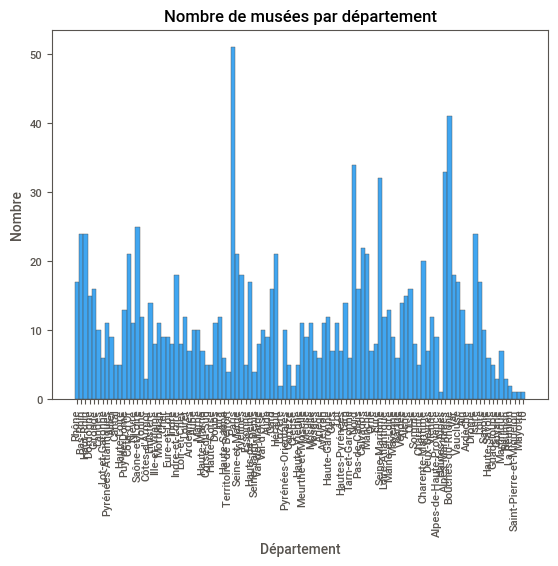

In [ ]:
 #1. Histogramme nombre de musées par departement

sns.histplot(data=df_musee, x="Departement", bins=20)
plt.title("Nombre de musées par département")
plt.xlabel("Département")
plt.ylabel("Nombre")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Uniformisation Ile de france ecrit avec accent ou non#
df_musée_clean['Region']=df_musée_clean['Region'].replace('Île-de-France','Ile-de-France')



/var/folders/qh/wjw4zfcd5xz24bq6xyr2526m0000gp/T/ipykernel_91728/1154443444.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



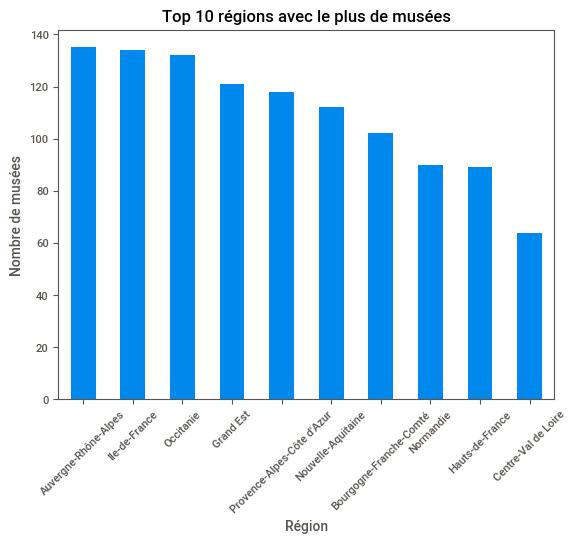

In [ ]:

# Top 10 régions avec le plus de musées
top_regions = df_musée_clean["Region"].value_counts().head(10)

top_regions.plot(kind="bar")
plt.title("Top 10 régions avec le plus de musées")
plt.xlabel("Région")
plt.ylabel("Nombre de musées")
plt.xticks(rotation=45)
plt.show()


In [ ]:
df_patri = pd.read_csv(ARCHITETURE_PATH, sep="|", dtype=str, header=0)
df_patri.head(2)

,Reference_de_la_notice,Ancienne_reference_de_la_notice_RENV,Cadre_de_l_etude,Region,Numero_departement,Commune,Ancien_nom_commune,INSEE,Lieudit,Adresse_normalisee,...,Partie_d_elevation_exterieure,Materiaux_de_la_couverture,Typologie_de_plan,Technique_du_decor_porte_de_l_edifice,Indexation_iconographique_normalisee,Description_de_l_elevation_interieure,Emplacement_forme_structure_escalier,etat_de_conservation,Description_de_l_edifice,Commune_forme_editoriale
0,ACR0000001,NaN,Labellisé Architecture contemporaine remarquable,Auvergne-Rhône-Alpes,01,Ars-sur-Formans,NaN,01021,NaN,Docteur-Nodet (rue) 31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Située au sud de la basilique, l'église Notre-...",Ars-sur-Formans
1,ACR0000002,NaN,Labellisé Architecture contemporaine remarquable,Auvergne-Rhône-Alpes,01,Valserhône,Anciennement commune de : Bellegarde-sur-Valse...,01033,NaN,République (rue de la) 34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L'Hôtel de Ville de Bellegarde-sur-Valserine e...,Valserhône


In [ ]:
df_archi = pd.read_csv(ARCHITETURE_PATH, sep="|", dtype=str, header=0)
df_archi.head(2)

In [ ]:
df_musee = pd.read_csv(MUSEE_PATH, sep="|", dtype=str, header=0)
df_musee.head(2)

,Identifiant,Nom_officiel,Adresse,Lieu,Code_postal,Ville,Departement,Region,URL,Telephone,...,Themes,Artiste,Personnage_phare,Interet,Protection_batiment,Protection_espace,Refmer,Annee_creation,Date_de_mise_a_jour,Coordonnees
0,M1128,musée des sapeurs-pompiers de Lyon,358 avenue de Champagne,Centre de secours principal,69009,Lyon,Rhône,Auvergne-Rhône-Alpes,museepompiers.com/,04 72 17 54 54,...,"Armes, Uniformes, Véhicules pompiers, Archives...",NaN,NaN,NaN,NaN,NaN,SPR8400131,1971,2025-07-25,"45.790491, 4.797411"
1,M0001,musée de la Folie Marco,30 rue du docteur Sultzer,NaN,67140,Barr,Bas-Rhin,Grand Est,www.musee-foliemarco.com,03 88 08 94 72,...,"Arts décoratifs : Mobilier, Objets d'art",NaN,NaN,Demeure patricienne d'architecture française d...,Protégé au titre des Monuments historiques : h...,Abords d'un Monument historique. Site inscrit.,PA00084599;IA00115077,1960,2025-07-25,"48.410166, 7.451102"


In [ ]:
df_patri = pd.read_csv(PATRIMOINE_PATH, sep="|", dtype=str, header=0)
df_patri.head(2)

,Identifiant,Nom_officiel,Adresse,Lieu,Code_postal,Ville,Departement,Region,URL,Telephone,...,Themes,Artiste,Personnage_phare,Interet,Protection_batiment,Protection_espace,Refmer,Annee_creation,Date_de_mise_a_jour,Coordonnees
0,M1128,musée des sapeurs-pompiers de Lyon,358 avenue de Champagne,Centre de secours principal,69009,Lyon,Rhône,Auvergne-Rhône-Alpes,museepompiers.com/,04 72 17 54 54,...,"Armes, Uniformes, Véhicules pompiers, Archives...",NaN,NaN,NaN,NaN,NaN,SPR8400131,1971,2025-07-25,"45.790491, 4.797411"
1,M0001,musée de la Folie Marco,30 rue du docteur Sultzer,NaN,67140,Barr,Bas-Rhin,Grand Est,www.musee-foliemarco.com,03 88 08 94 72,...,"Arts décoratifs : Mobilier, Objets d'art",NaN,NaN,Demeure patricienne d'architecture française d...,Protégé au titre des Monuments historiques : h...,Abords d'un Monument historique. Site inscrit.,PA00084599;IA00115077,1960,2025-07-25,"48.410166, 7.451102"


In [ ]:
report_musee = sv.analyze(df_musee)
report_musee.show_html("sweetviz_report_musee.html")

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report sweetviz_report_musee.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
report_archi = sv.analyze(df_archi)
report_archi.show_html("sweetviz_report_archi.html")

Done! Use 'show' commands to display/save.   |██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| [100%]   00:00 -> (00:00 left)


Report sweetviz_report_archi.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
report_patri = sv.analyze(df_patri)
report_patri.show_html("sweetviz_report_patri.html")

Done! Use 'show' commands to display/save.   |██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| [100%]   00:00 -> (00:00 left)


Report sweetviz_report_patri.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
df_musee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Identifiant          1222 non-null   object
 1   Nom_officiel         1222 non-null   object
 2   Adresse              1193 non-null   object
 3   Lieu                 482 non-null    object
 4   Code_postal          1222 non-null   object
 5   Ville                1222 non-null   object
 6   Departement          1222 non-null   object
 7   Region               1222 non-null   object
 8   URL                  1135 non-null   object
 9   Telephone            1196 non-null   object
 10  Categorie            518 non-null    object
 11  Domaine_thematique   1178 non-null   object
 12  Histoire             1170 non-null   object
 13  Atout                1156 non-null   object
 14  Themes               1077 non-null   object
 15  Artiste              510 non-null    object
 16  Person

In [ ]:
df_archi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784 entries, 0 to 1783
Data columns (total 44 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Reference_de_la_notice                            1784 non-null   object
 1   Ancienne_reference_de_la_notice_RENV              513 non-null    object
 2   Cadre_de_l_etude                                  1777 non-null   object
 3   Region                                            1782 non-null   object
 4   Numero_departement                                1783 non-null   object
 5   Commune                                           1779 non-null   object
 6   Ancien_nom_commune                                42 non-null     object
 7   INSEE                                             1762 non-null   object
 8   Lieudit                                           100 non-null    object
 9   Adresse_normalisee            

In [ ]:
df_patri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Identifiant          1222 non-null   object
 1   Nom_officiel         1222 non-null   object
 2   Adresse              1193 non-null   object
 3   Lieu                 482 non-null    object
 4   Code_postal          1222 non-null   object
 5   Ville                1222 non-null   object
 6   Departement          1222 non-null   object
 7   Region               1222 non-null   object
 8   URL                  1135 non-null   object
 9   Telephone            1196 non-null   object
 10  Categorie            518 non-null    object
 11  Domaine_thematique   1178 non-null   object
 12  Histoire             1170 non-null   object
 13  Atout                1156 non-null   object
 14  Themes               1077 non-null   object
 15  Artiste              510 non-null    object
 16  Person

In [ ]:
df_musee.isna()

,Identifiant,Nom_officiel,Adresse,Lieu,Code_postal,Ville,Departement,Region,URL,Telephone,...,Themes,Artiste,Personnage_phare,Interet,Protection_batiment,Protection_espace,Refmer,Annee_creation,Date_de_mise_a_jour,Coordonnees
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,True,True,False,True,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,True,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,False,False,False,True,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,False,False
1218,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,False,False
1219,False,False,False,True,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,False,False
1220,False,False,False,False,False,False,False,False,True,False,...,False,True,True,True,True,True,True,True,False,False


In [ ]:
df_patri.describe()

,Identifiant,Nom_officiel,Adresse,Lieu,Code_postal,Ville,Departement,Region,URL,Telephone,...,Themes,Artiste,Personnage_phare,Interet,Protection_batiment,Protection_espace,Refmer,Annee_creation,Date_de_mise_a_jour,Coordonnees
count,1222,1222,1193,482,1222,1222,1222,1222,1135,1196,...,1077,510,530,950,492,777,779,278,1222,1222
unique,1222,1044,1093,410,893,850,104,18,1101,1164,...,1018,509,525,942,483,123,672,152,69,1204
top,M1128,musée municipal,mairie,château,67000,Paris,Paris,Auvergne-Rhône-Alpes,www.ville-saintes.fr/decouvrir-sortir/culture/...,03 22 97 14 00,...,"Archéologie nationale : Préhistoire, Protohist...",Pierre-Adrien Pâris.,"Marcel Joannon, dit Marcel Provence (1892 - 19...",Hôtel particulier du XVIIe siècle.,Protégé au titre des Monuments historiques,Site patrimonial remarquable.,SPR1100002;SPR1100001,1983,2024-02-07,"48.581229, 7.751984"
freq,1,49,13,26,8,51,51,135,4,3,...,5,2,2,3,4,249,16,8,145,3


In [ ]:
df_archi.describe()

,Reference_de_la_notice,Ancienne_reference_de_la_notice_RENV,Cadre_de_l_etude,Region,Numero_departement,Commune,Ancien_nom_commune,INSEE,Lieudit,Adresse_normalisee,...,Partie_d_elevation_exterieure,Materiaux_de_la_couverture,Typologie_de_plan,Technique_du_decor_porte_de_l_edifice,Indexation_iconographique_normalisee,Description_de_l_elevation_interieure,Emplacement_forme_structure_escalier,etat_de_conservation,Description_de_l_edifice,Commune_forme_editoriale
count,1784,513,1777,1782,1783,1779,42,1762,100,1614,...,7,29,4,6,9,12,4,6,1388,1773
unique,1784,495,2,18,93,896,36,878,84,1570,...,3,12,3,6,9,9,4,6,1376,897
top,ACR0000001,plusieurs édifices concernés,Labellisé Architecture contemporaine remarquable,Île-de-France,13,Tours,Anciennement commune de : Le Verdon,37261,69387,Église (place de l'),...,béton,béton en couverture,ensemble concerté,maçonnerie,trois étages carrés,un étage carré,ascenseur,désaffecté,Guillaume Gillet a repensé l'esthétique des ch...,Toulouse
freq,1,14,1765,257,93,29,4,29,5,5,...,5,12,2,1,1,3,1,1,4,29


In [ ]:
import plotly.express

In [ ]:
df_archi.isna

<bound method DataFrame.isna of      Reference_de_la_notice Ancienne_reference_de_la_notice_RENV  \
0                ACR0000001                                  NaN   
1                ACR0000002                                  NaN   
2                ACR0000003                                  NaN   
3                ACR0000004                                  NaN   
4                ACR0000005                                  NaN   
...                     ...                                  ...   
1779             ACR0002005                                  NaN   
1780             ACR0002006                                  NaN   
1781             ACR0002007                                  NaN   
1782             ACR0002008                                  NaN   
1783             ACR0002009                                  NaN   

                                      Cadre_de_l_etude  \
0     Labellisé Architecture contemporaine remarquable   
1     Labellisé Architecture contem